In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from statsmodels.stats import weightstats as stests
import scipy.stats as stats
from scipy.stats import chi2_contingency

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('fivethirtyeight')
import seaborn as sns
import bokeh as bk

import plotly.express as px
import plotly.graph_objs as go

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score,roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

# **Dependant and Independant Features**

In [3]:
#importind tha finalised dataset
data=pd.read_csv('E:/HR analytics and prediction/final_dataset.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)

data_dup=data.copy()#creating a duplicate copy

data.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobRole,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,DailyRate,MonthlyIncome
0,41,1,2,2,3,2,4,8,11,0,...,0,0,0,0,0,1,0,1,0.430636,0.322430
1,49,8,1,3,2,4,2,1,23,1,...,0,0,0,0,1,0,1,0,-0.758671,0.110182
2,37,2,2,4,2,9,3,6,15,0,...,0,1,0,0,0,1,0,1,0.822254,-0.637482
3,33,3,4,4,3,4,3,1,11,0,...,0,0,0,0,1,0,0,1,0.849711,-0.436055
4,27,2,1,1,3,9,2,9,12,1,...,1,0,0,0,1,0,1,0,-0.307803,-0.298574


In [4]:
#seperating dependant features into x_data and independant features into y_data
x_data=pd.DataFrame()
y_data=pd.DataFrame()
y_data['Attrition']=data['Attrition']
x_data=data.drop(['Attrition'],axis=1)
print(y_data['Attrition'].value_counts())
y_data.head()

Attrition
0    1141
1     232
Name: count, dtype: int64


,Attrition
0,1
1,0
2,1
3,0
4,0


In [5]:
#converting the above two datasets into listed format
y= y_data.iloc[:,0]
x=x_data.iloc[:,:]

# **Checking Imbalency in target feature**

In [6]:
#checking for count of attrition data
y_counts=y.value_counts()
#there is so much of imbalnecy
#necessary steps needs to be taken to prevent the imbalency

ratio_y= y_counts[1]/y_counts[0]
print(ratio_y)

0.203330411919369


In [7]:
#initializing oversampling using SMOTE
smote = SMOTETomek(sampling_strategy=0.49,random_state=111)

#fitting the data and resampling it
x_sm,y_sm = smote.fit_resample(x,y)

#now x_sm, y_sm are resampled data

#retirieving the resampled data
print(y_sm.value_counts())
print(x_sm.shape)

Attrition
0    1123
1     541
Name: count, dtype: int64
(1664, 27)


# **Using ML Algorithms to predict the outcome**

In [8]:
#dividing the data into train_test_split
train_x,test_x,train_y,test_y = train_test_split(x_sm,y_sm,test_size=0.2,random_state=44)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape) #printing the shapes to check whether data is spreaded into it correcty

(1331, 27) (333, 27) (1331,) (333,)


**Using Logistic Regression**

In [9]:
#using logistic regression to fit the training data and predicting the test data
lgr = LogisticRegression(fit_intercept=True) #calling the lgr function
data_fit= lgr.fit(train_x,train_y) #fitting and training the machine
data_predict = data_fit.predict(test_x) # predicting using test data

[[211  12]
 [ 36  74]]


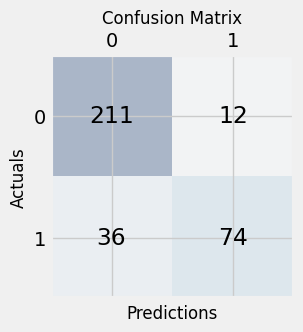

The accuracy of this model is 85.59 %.
The recall of this model is 67.27 %.



In [10]:
#creating a confusion matrix to show correctly predicted values
cm = confusion_matrix(test_y, data_predict)
print(cm)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()
# plot(cm)

### Printing the accuracy and recall of the model

logistic_regression_accuracy = round(100 * accuracy_score(test_y, data_predict), 2)

logistic_regression_recall = round(100 * recall_score(test_y, data_predict), 2)

print('The accuracy of this model is {} %.'.format(logistic_regression_accuracy))
print('The recall of this model is {} %.'.format(logistic_regression_recall))
print()

**Using KMeansClassifier**

In [17]:
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',p=2,metric='minkowski') #calling the lgr function
data_fit_knn= knn.fit(train_x,train_y) #fitting and training the machine
data_predict_knn = data_fit_knn.predict(test_x)

[[181  42]
 [ 26  84]]


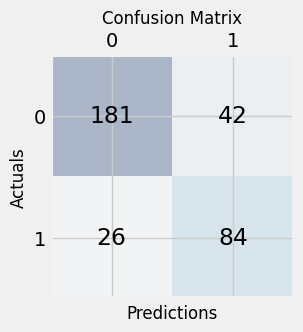

The accuracy of this model is 79.58 %.
The recall of this model is 76.36 %.



In [18]:
#creating a confusion matrix to show correctly predicted values
cm1 = confusion_matrix(test_y, data_predict_knn)
print(cm1)

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()
# plot(cm)

### Printing the accuracy and recall of the model

knn_accuracy = round(100 * accuracy_score(test_y, data_predict_knn), 2)

knn_recall = round(100 * recall_score(test_y, data_predict_knn), 2)

print('The accuracy of this model is {} %.'.format(knn_accuracy))
print('The recall of this model is {} %.'.format(knn_recall))
print()

In [21]:
test_y

1169    0
1542    1
344     1
199     1
9       0
       ..
1054    0
494     0
68      0
134     0
1265    1
Name: Attrition, Length: 333, dtype: int64